In [1]:
# montar google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
df_dados_noticias_limpo = pd.read_csv('/content/drive/My Drive/aneel-imprensa-2020/dados/dados_noticias_limpo.csv')

In [4]:
df_dados_noticias_limpo.head()

Nome Veículo      Categoria Data Notícia  \
0  DIÁRIO DO GRANDE ABC - SP      REGULAÇÃO   2020-01-01   
1       O ESTADO DE S. PAULO  INSTITUCIONAL   2020-01-01   
2       AGÊNCIA O GLOBO - RJ  INSTITUCIONAL   2020-01-01   
3       AGÊNCIA O GLOBO - RJ        MERCADO   2020-01-01   
4       AGÊNCIA O GLOBO - RJ      REGULAÇÃO   2020-01-01   

                                        Título limpo  \
0         atila diminui orçamento arsep aumenta sama   
1  juro menor ajuda reduzir custos industriais ed...   
2  vem brazil water week evento internacional tra...   
3  polo multissetorial serviços vai mudar cara ba...   
4  polo multissetorial serviços vai mudar cara ba...   

                                 Texto Notícia limpo  
0  prefeito mauá atila jacomussi psb decidiu dar ...  
1  estrutural redução custos setor manufatureiro ...  
2  energia alternativa abes associação brasileira...  
3  economia bairro recife belas paisagens pernamb...  
4  economia bairro recife belas paisagens pernamb...

In [5]:
#quantidade de notícias que citam aneel
df_noticias_citam_aneel = df_dados_noticias_limpo[df_dados_noticias_limpo['Texto Notícia limpo'].str.contains('aneel') & df_dados_noticias_limpo['Texto Notícia limpo'].notnull()]
df_noticias_citam_aneel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64067 entries, 1 to 131867
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Nome Veículo         64067 non-null  object
 1   Categoria            64067 non-null  object
 2   Data Notícia         64067 non-null  object
 3   Título limpo         64063 non-null  object
 4   Texto Notícia limpo  64067 non-null  object
dtypes: object(5)
memory usage: 2.9+ MB


In [6]:
# Quantidade de veículos que citam aneel
len(df_noticias_citam_aneel['Nome Veículo'].unique())

2964

In [7]:
# transforma a coluna Data Notícia em datetime64
df_noticias_citam_aneel['Data Notícia'] = pd.to_datetime(df_noticias_citam_aneel['Data Notícia'], format="%Y-%m-%d")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
# lista para retirar palavras comuns e óbvias
lista_palavras_comuns = ['energia',
                         'institucional',
                         'aneel',
                         'elétrica',
                         'nacional',
                         'agência',
                         'conta',
                         'consumidores',
                         'ser',
                         'estado',
                         'ainda',
                         'mês',
                         'sobre',
                         'desde',
                         'disse',
                         'segundo',
                         'pode',
                         'ano',
                         'mil',
                         'milhões',
                         'dia',
                         'nesta',
                         'hoje',
                         'paulo',
                         'mato',
                         'grosso',
                         'janeiro',
                         'fevereiro',
                         'março',
                         'abril',
                         'maio',
                         'junho',
                         'julho',
                         'agosto',
                         'setembro',
                         'outubro',
                         'novembro',
                         'dezembro',
                         'segunda',
                         'terça',
                         'quarta',
                         'quinta',
                         'sexta',
                         'sábado',
                         'domingo',
                         'feira'
]

##Wordcloud geral

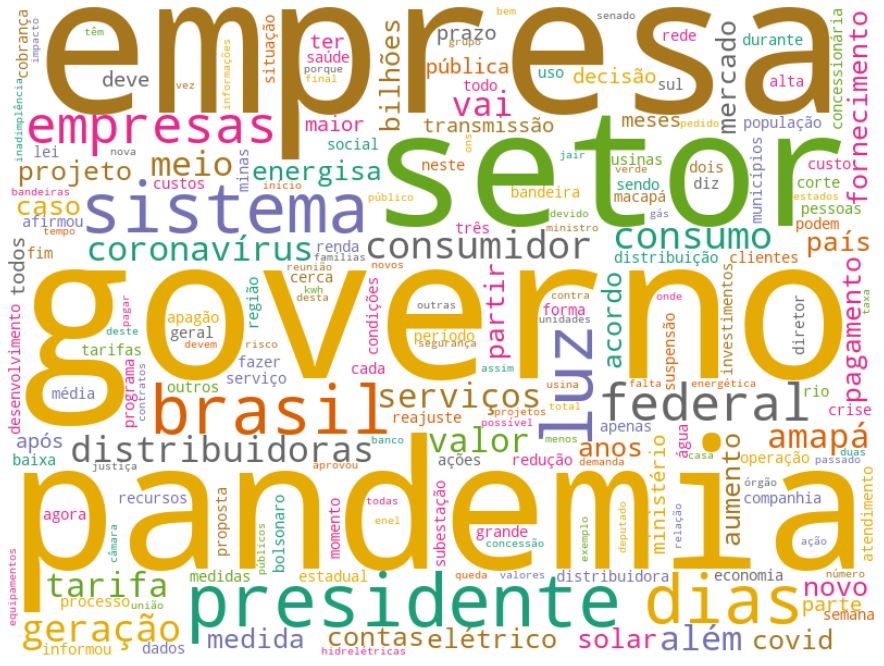

In [9]:
# Processamento pode demorar um pouco
str_noticias_citam_aneel = ' '.join(
    df_noticias_citam_aneel['Texto Notícia limpo']
    [df_noticias_citam_aneel['Texto Notícia limpo'].notnull()]
)

str_noticias_citam_aneel = ' '.join(x for x in str_noticias_citam_aneel.split() if x not in lista_palavras_comuns)

tokens = nltk.word_tokenize(str_noticias_citam_aneel)
frequencia = nltk.FreqDist(tokens)

wordcloud = WordCloud(width = 800, height = 600, background_color='white', colormap='Dark2', mask=None, random_state=2022)
wordcloud.generate_from_frequencies(frequencies=frequencia)
plt.figure(figsize=(16, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

##Quantidade por veículo

In [10]:
#quantidade de notícias por veículo
pd.options.display.max_rows = 1000 #60 o padrão
df_noticias_veiculos = df_noticias_citam_aneel['Nome Veículo'].groupby(df_noticias_citam_aneel['Nome Veículo']).count().sort_values(ascending=False).to_frame('Quantidade').reset_index()
df_noticias_veiculos['percentual_noticias'] = df_noticias_veiculos['Quantidade'].cumsum()/df_noticias_veiculos['Quantidade'].sum()*100

df_noticias_veiculos[0:500]

Nome Veículo  Quantidade  \
0                                        CANAL ENERGIA        2542   
1                                         PORTAL TERRA        1670   
2                                           PORTAL UOL        1446   
3                               ISTO É DINHEIRO ONLINE        1022   
4                                 VALOR ECONÔMICO - SP         887   
5                                         VALOR ONLINE         857   
6                                REVISTA ISTO É ONLINE         814   
7                                PÁGINA DO ESTADO - MT         805   
8                                        G1 - NACIONAL         726   
9                                  AGÊNCIA ESTADO - SP         630   
10                                PARANOÁ ENERGIA - DF         550   
11                              O GLOBO - ON LINE - RJ         447   
12                       REVISTA ÉPOCA NEGÓCIOS ONLINE         435   
13                                   FOLHA ONLINE - SP         431   
14                            A CRÍTICA - ON LINE - MS         393   
15                                TANGARA EM FOCO - MT         386   
16                      ESTADO DE MINAS - ON LINE - MG         347   
17                                    INVESTING BRAZIL         337   
18                                    ESTAÇÃO LIVRE MT         329   
19                             JORNAL DO COMÉRCIO - RS         324   
20                                      PODER 360 - DF         314   
21                                                  R7         312   
22                                O ESTADO DE S. PAULO         306   
23                                                 BOL         298   
24                                 HIPER NOTÍCIAS - MT         272   
25                                       FOLHAMAX - MT         271   
26                                REVISTA EXAME ONLINE         268   
27                          DINHEIRO RURAL ONLINE - SP         266   
28                                EXTRA - ON LINE - RJ         258   
29                                      REUTERS BRASIL         257   
30                                            MIX VALE         257   
31                           AQUI NOTÍCIAS ONLINE - ES         256   
32                                      O LIBERAL - PA         248   
33                                           GAÚCHA ZH         246   
34                                  LAPADA LAPADA - MT         243   
35                        TRIBUNA DO SERTÃO ONLINE- AL         241   
36                            CORREIO BRAZILIENSE - DF         240   
37                                JORNAL O DIÁRIO - MT         234   
38                                 ESTADÃO ONLINE - SP         231   
39                           BEM PARANÁ - ON LINE - PR         225   
40                             DIÁRIO DE NOTÍCIAS - SP         223   
41                            JORNAL DO COMMERCIO - PE         220   
42                                       A GAZETA - MT         215   
43                 DIÁRIO DO GRANDE ABC - ON LINE - SP         209   
44                                          BROADCAST+         208   
45                     JORNAL O NOROESTE - ONLINE - MT         208   
46                                      AGÊNCIA BRASIL         208   
47                             TRIBUNA DO AGRESTE - AL         203   
48                              FOLHA DE S. PAULO - SP         198   
49                                        O GLOBO - RJ         195   
50                                        PORTAL SOLAR         195   
51                                   VITÓRIA NEWS - ES         195   
52                             DIÁRIO DO COMÉRCIO - MG         187   
53                             BLOG POLÍTICA EM DEBATE         187   
54                                   PLANTÃO NEWS - MT         184   
55             TV CENTRO AMÉRICA/AF. GLOBO CUIABÁ - MT         177   
56                                  O POVO ONLINE - 

In [11]:
#cria dicionário para gerar wordcloud
d = {}
for a, x in df_noticias_veiculos[['Nome Veículo', 'Quantidade']].values:
  d[a] = x

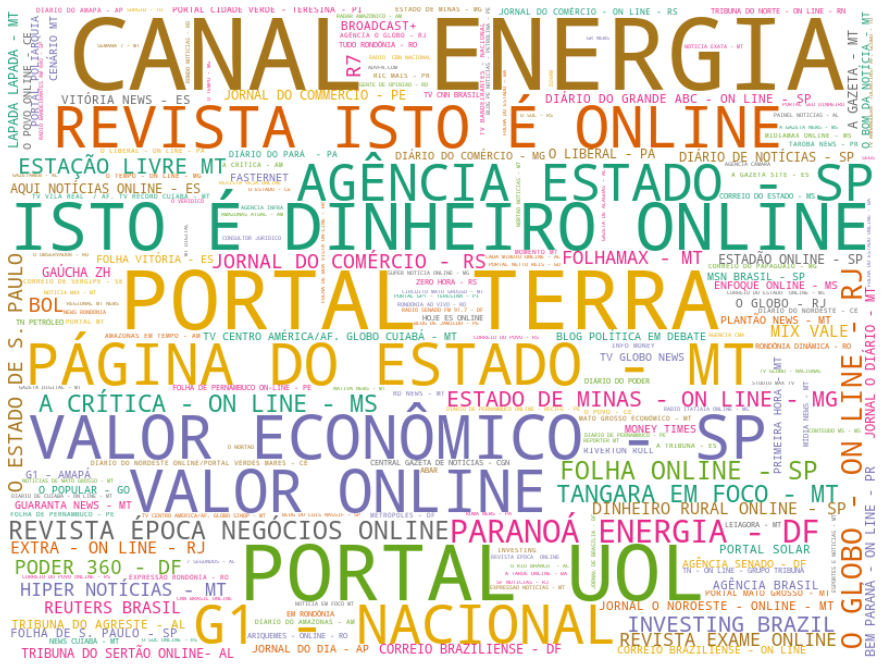

In [12]:
wordcloud = WordCloud(width = 800, height = 600, background_color='white', colormap='Dark2', mask=None, random_state=2022)
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize=(16, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

##Gráfico para identificar os picos

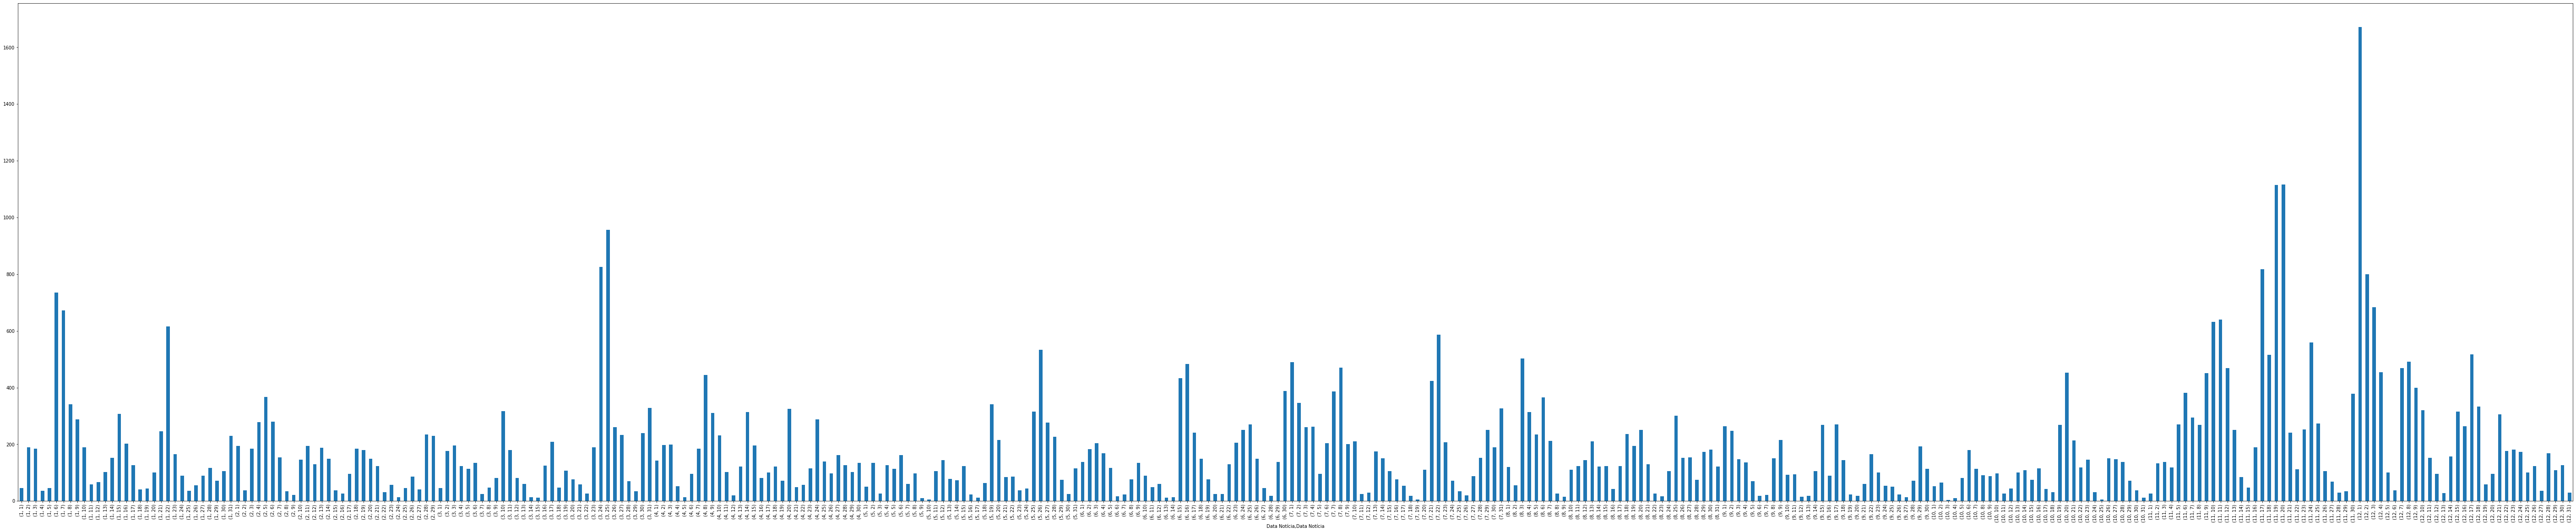

In [13]:
#gráfico para identificar os picos
df_noticias_citam_aneel['Data Notícia'].groupby([df_noticias_citam_aneel['Data Notícia'].dt.month, df_noticias_citam_aneel['Data Notícia'].dt.day]).count().plot(kind='bar', figsize=(100, 20))

##1º Trimestre

(0.0, 1600.0)

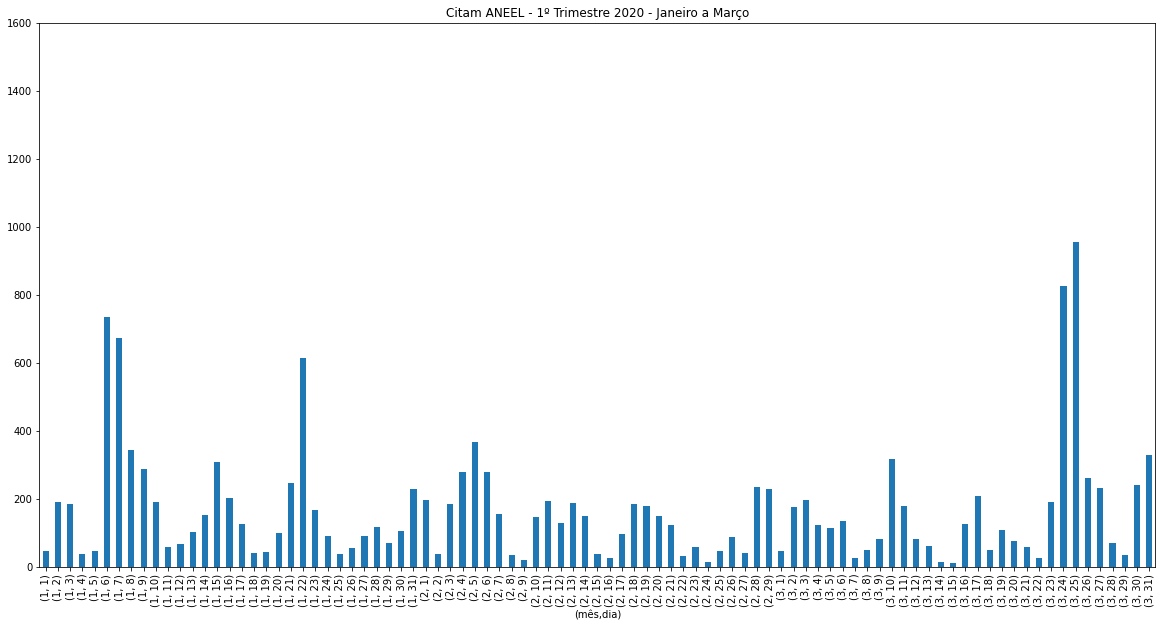

In [14]:
# 1º Trimestre
df_noticias_citam_aneel['Data Notícia'][df_noticias_citam_aneel['Data Notícia'].dt.month <= 3].groupby([df_noticias_citam_aneel['Data Notícia'].dt.month.rename("(mês"), df_noticias_citam_aneel['Data Notícia'].dt.day.rename("dia)")]).count().plot(
    kind='bar',
    figsize=(20, 10),
    title='Citam ANEEL - 1º Trimestre 2020 - Janeiro a Março').set_ylim(0, 1600)

In [16]:
#Picos: 06/01, 22/01 e 25/03

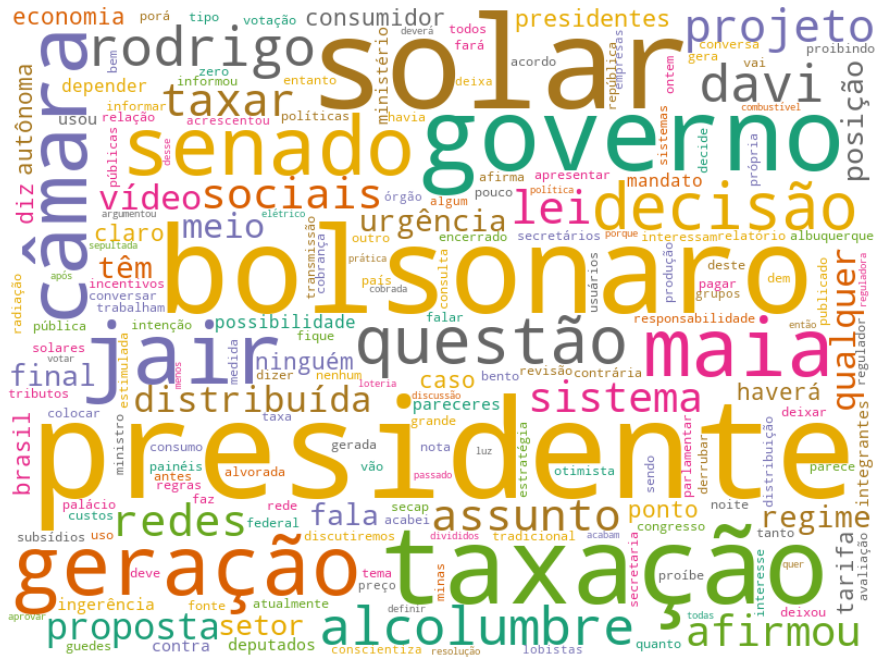

In [15]:
# 06/01
str_noticias_pico = ' '.join(
    df_noticias_citam_aneel['Texto Notícia limpo']
    [df_noticias_citam_aneel['Data Notícia'].isin(['2020-01-06'])]
    [df_noticias_citam_aneel['Texto Notícia limpo'].notnull()]
)

str_noticias_pico = ' '.join(x for x in str_noticias_pico.split() if x not in lista_palavras_comuns)

tokens = nltk.word_tokenize(str_noticias_pico)
frequencia = nltk.FreqDist(tokens)

wordcloud = WordCloud(width = 800, height = 600, background_color='white', colormap='Dark2', mask=None, random_state=2022)
wordcloud.generate_from_frequencies(frequencies=frequencia)
plt.figure(figsize=(16, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

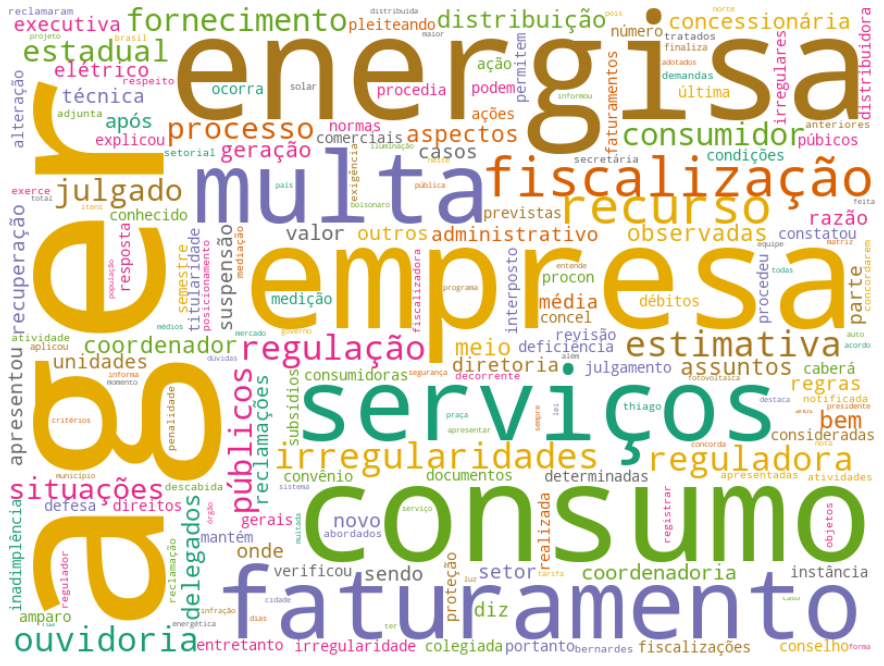

In [17]:
# 22/01
str_noticias_pico = ' '.join(
    df_noticias_citam_aneel['Texto Notícia limpo']
    [df_noticias_citam_aneel['Data Notícia'].isin(['2020-01-22'])]
    [df_noticias_citam_aneel['Texto Notícia limpo'].notnull()]
)

str_noticias_pico = ' '.join(x for x in str_noticias_pico.split() if x not in lista_palavras_comuns)

tokens = nltk.word_tokenize(str_noticias_pico)
frequencia = nltk.FreqDist(tokens)

wordcloud = WordCloud(width = 800, height = 600, background_color='white', colormap='Dark2', mask=None, random_state=2022)
wordcloud.generate_from_frequencies(frequencies=frequencia)
plt.figure(figsize=(16, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

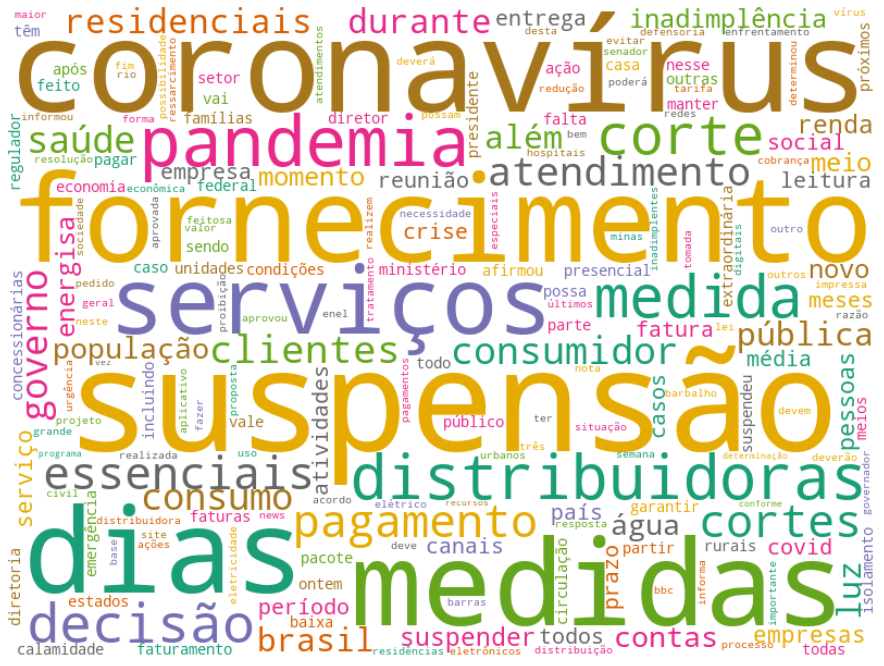

In [18]:
# 25/03
str_noticias_pico = ' '.join(
    df_noticias_citam_aneel['Texto Notícia limpo']
    [df_noticias_citam_aneel['Data Notícia'].isin(['2020-03-25'])]
    [df_noticias_citam_aneel['Texto Notícia limpo'].notnull()]
)

str_noticias_pico = ' '.join(x for x in str_noticias_pico.split() if x not in lista_palavras_comuns)

tokens = nltk.word_tokenize(str_noticias_pico)
frequencia = nltk.FreqDist(tokens)

wordcloud = WordCloud(width = 800, height = 600, background_color='white', colormap='Dark2', mask=None, random_state=2022)
wordcloud.generate_from_frequencies(frequencies=frequencia)
plt.figure(figsize=(16, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

##2º Trimestre

(0.0, 1600.0)

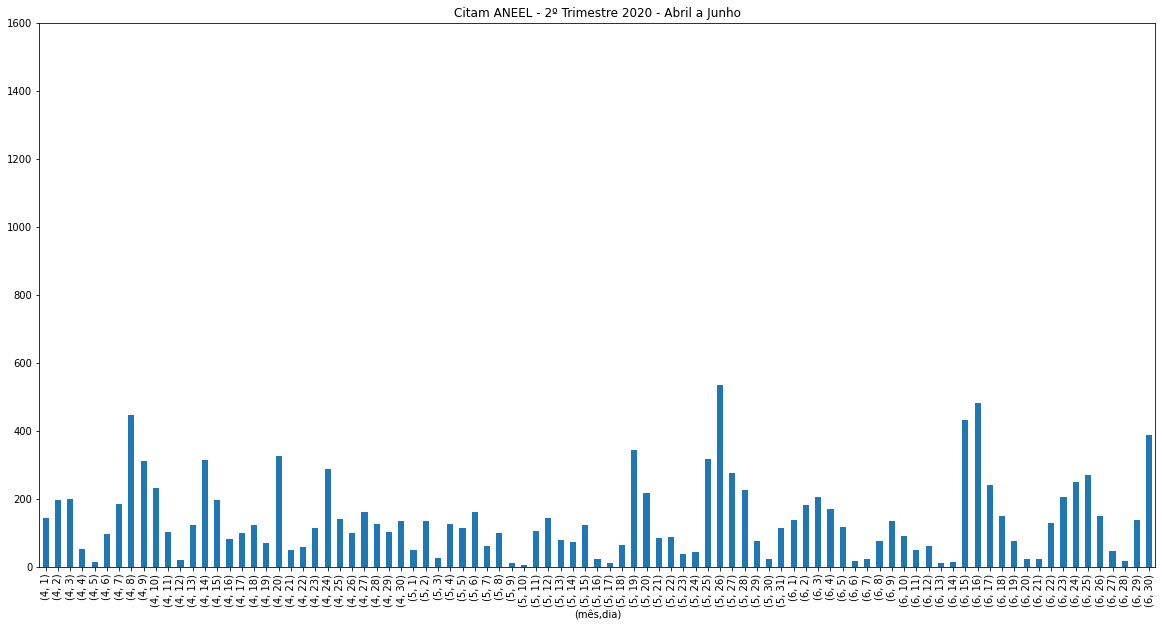

In [19]:
# 2º Trimestre
df_noticias_citam_aneel['Data Notícia'][(df_noticias_citam_aneel['Data Notícia'].dt.month >= 4) & (df_noticias_citam_aneel['Data Notícia'].dt.month <= 6)].groupby([df_noticias_citam_aneel['Data Notícia'].dt.month.rename("(mês"), df_noticias_citam_aneel['Data Notícia'].dt.day.rename("dia)")]).count().plot(
    kind='bar',
    figsize=(20, 10),
    title='Citam ANEEL - 2º Trimestre 2020 - Abril a Junho').set_ylim(0, 1600)

##3º Trimestre

(0.0, 1600.0)

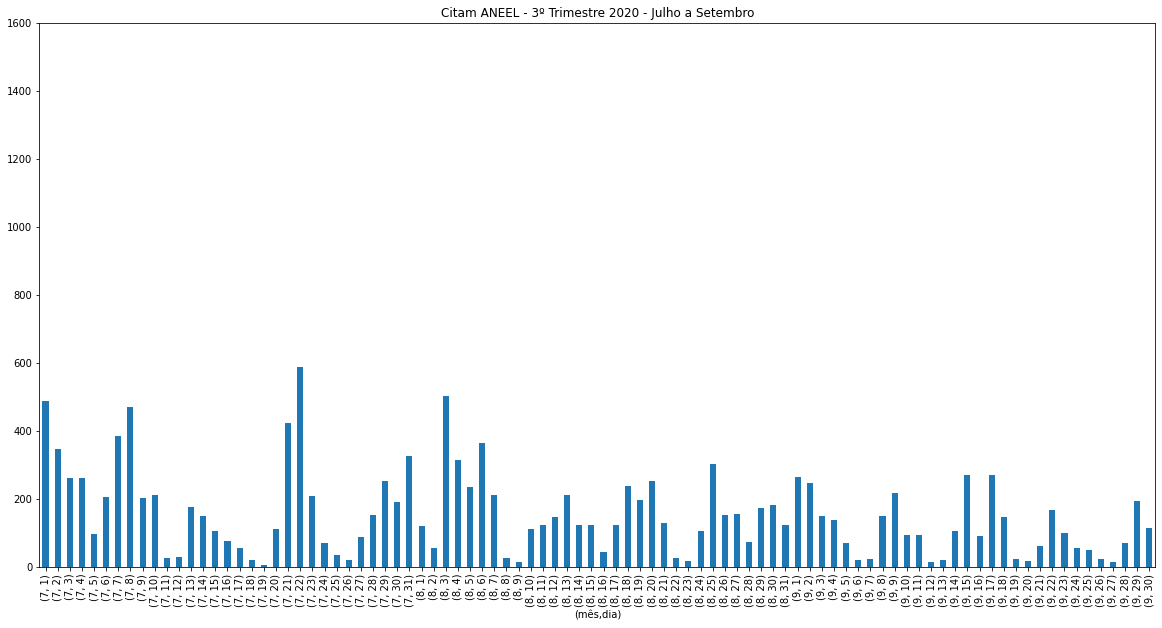

In [20]:
# 3º Trimestre
df_noticias_citam_aneel['Data Notícia'][(df_noticias_citam_aneel['Data Notícia'].dt.month >= 7) & (df_noticias_citam_aneel['Data Notícia'].dt.month <= 9)].groupby([df_noticias_citam_aneel['Data Notícia'].dt.month.rename("(mês"), df_noticias_citam_aneel['Data Notícia'].dt.day.rename("dia)")]).count().plot(
    kind='bar',
    figsize=(20, 10),
    title='Citam ANEEL - 3º Trimestre 2020 - Julho a Setembro').set_ylim(0, 1600)

##4º Trimestre

(0.0, 1600.0)

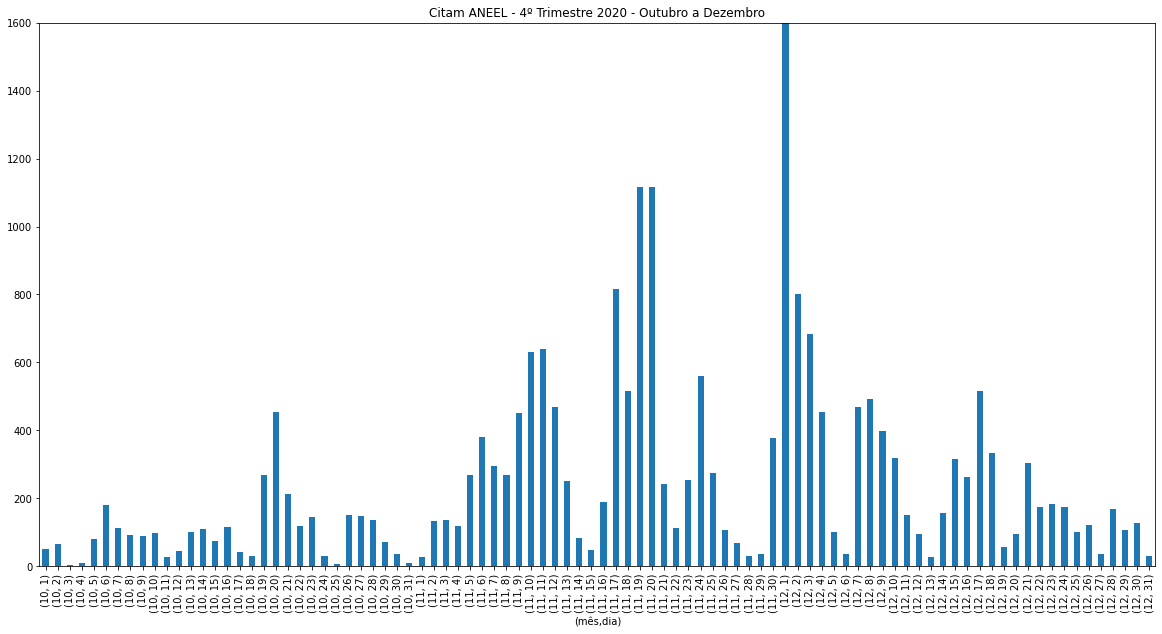

In [21]:
# 4º Trimestre
df_noticias_citam_aneel['Data Notícia'][(df_noticias_citam_aneel['Data Notícia'].dt.month >= 10) & (df_noticias_citam_aneel['Data Notícia'].dt.month <= 12)].groupby([df_noticias_citam_aneel['Data Notícia'].dt.month.rename("(mês"), df_noticias_citam_aneel['Data Notícia'].dt.day.rename("dia)")]).count().plot(
    kind='bar',
    figsize=(20, 10),
    title='Citam ANEEL - 4º Trimestre 2020 - Outubro a Dezembro').set_ylim(0, 1600)

In [22]:
#Picos: 10/11, 19/11 e 01/12

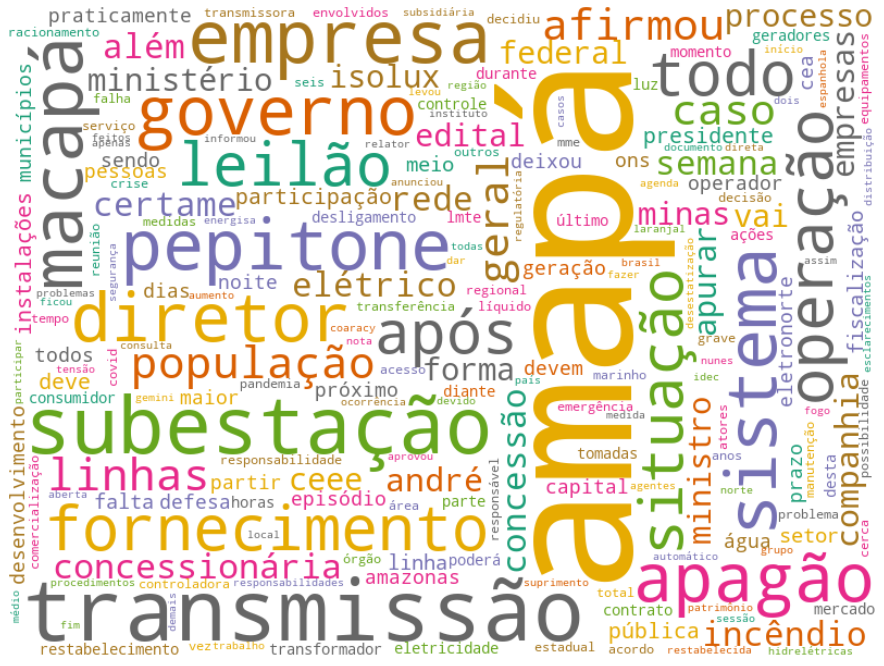

In [23]:
# 10/11
str_noticias_pico = ' '.join(
    df_noticias_citam_aneel['Texto Notícia limpo']
    [df_noticias_citam_aneel['Data Notícia'].isin(['2020-11-10'])]
    [df_noticias_citam_aneel['Texto Notícia limpo'].notnull()]
)

str_noticias_pico = ' '.join(x for x in str_noticias_pico.split() if x not in lista_palavras_comuns)

tokens = nltk.word_tokenize(str_noticias_pico)
frequencia = nltk.FreqDist(tokens)

wordcloud = WordCloud(width = 800, height = 600, background_color='white', colormap='Dark2', mask=None, random_state=2022)
wordcloud.generate_from_frequencies(frequencies=frequencia)
plt.figure(figsize=(16, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

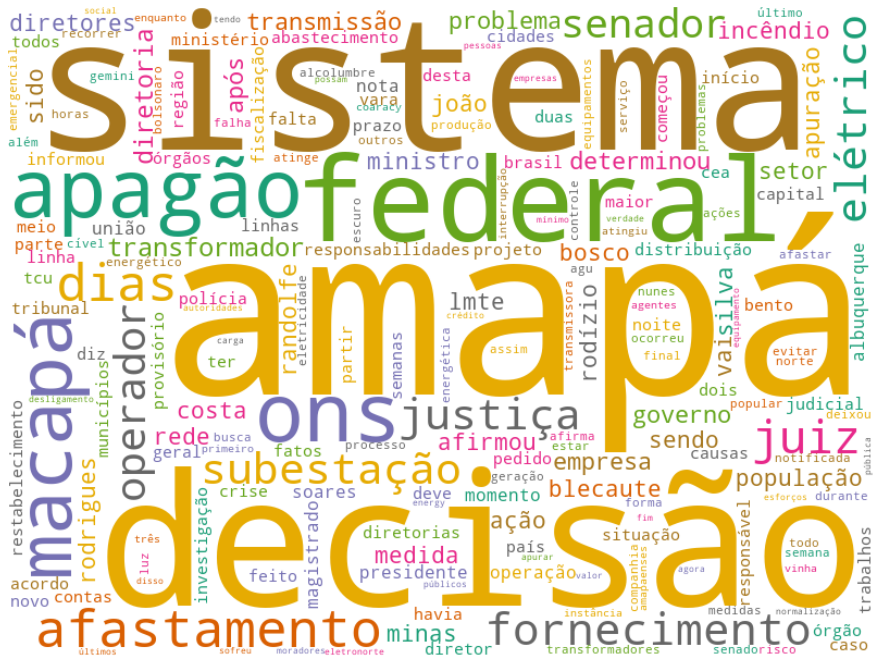

In [24]:
# 19/11
str_noticias_pico = ' '.join(
    df_noticias_citam_aneel['Texto Notícia limpo']
    [df_noticias_citam_aneel['Data Notícia'].isin(['2020-11-19'])]
    [df_noticias_citam_aneel['Texto Notícia limpo'].notnull()]
)

str_noticias_pico = ' '.join(x for x in str_noticias_pico.split() if x not in lista_palavras_comuns)

tokens = nltk.word_tokenize(str_noticias_pico)
frequencia = nltk.FreqDist(tokens)

wordcloud = WordCloud(width = 800, height = 600, background_color='white', colormap='Dark2', mask=None, random_state=2022)
wordcloud.generate_from_frequencies(frequencies=frequencia)
plt.figure(figsize=(16, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

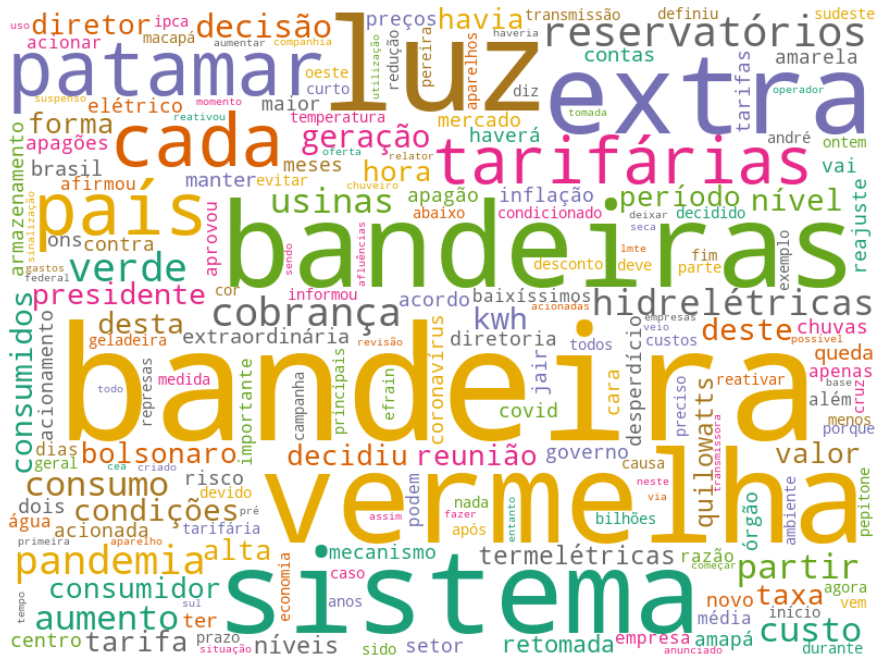

In [25]:
# 01/12
str_noticias_pico = ' '.join(
    df_noticias_citam_aneel['Texto Notícia limpo']
    [df_noticias_citam_aneel['Data Notícia'].isin(['2020-12-01'])]
    [df_noticias_citam_aneel['Texto Notícia limpo'].notnull()]
)

str_noticias_pico = ' '.join(x for x in str_noticias_pico.split() if x not in lista_palavras_comuns)

tokens = nltk.word_tokenize(str_noticias_pico)
frequencia = nltk.FreqDist(tokens)

wordcloud = WordCloud(width = 800, height = 600, background_color='white', colormap='Dark2', mask=None, random_state=2022)
wordcloud.generate_from_frequencies(frequencies=frequencia)
plt.figure(figsize=(16, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()